# 01 - Exploratory Data Analysis


In [1]:
# import libraries
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Apply the default theme
sns.set_theme()

In [2]:
# import track data
df = pd.read_csv("./data/playlist_tracks.csv")
playlist_data = pd.read_csv("./data/playlists.csv")

# merging the playlist info
df = df.merge(playlist_data, on="playlist_url")
df.head()

,preview_url,available_markets,explicit,type,episode,track,album,artists,disc_number,track_number,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name
0,https://p.scdn.co/mp3-preview/5f331286613eba71...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-5.894,0,0.0402,0.0459,0.852,0.0691,0.960,123.009,4,Lofi House
1,https://p.scdn.co/mp3-preview/b0eb532193111646...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-7.892,0,0.0707,0.0405,0.916,0.1020,0.646,117.018,4,Lofi House
2,https://p.scdn.co/mp3-preview/2ec7f3fa967937a1...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-7.570,0,0.0462,0.0237,0.731,0.5930,0.641,121.993,4,Lofi House
3,https://p.scdn.co/mp3-preview/2184855d4a8ff5fa...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-15.531,1,0.0282,0.3210,0.954,0.0822,0.171,132.986,4,Lofi House
4,https://p.scdn.co/mp3-preview/ddbaa2baf5d69d28...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-9.515,1,0.0472,0.1400,0.867,0.1460,0.418,126.027,4,Lofi House


In [3]:
# number of playlist
print("Number of playlists:", df["playlist_id"].nunique())

# number of tracks
print("Number of tracks:", df["id"].nunique())

Number of playlists: 4
Number of tracks: 435


Text(0.5, 1.0, 'Number of tracks per playlist')

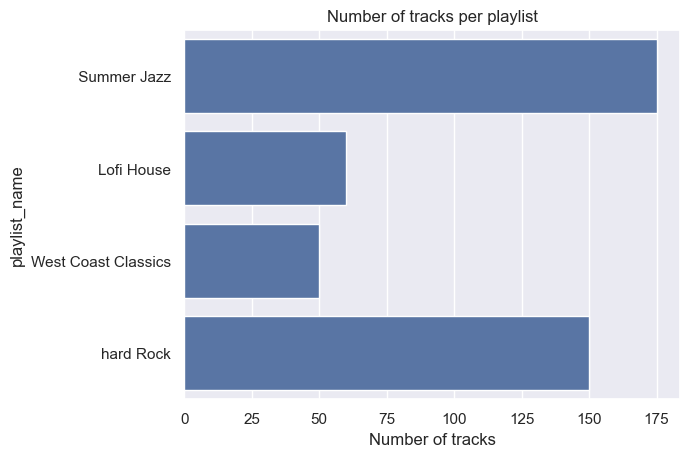

In [4]:
# number of tracks per playlist. As the numbfer of tracks is not the same, we will make sure to test for variance
sns.barplot(
    df.groupby("playlist_name")["id"].nunique().rename("Number of tracks"), orient="h"
)
plt.title("Number of tracks per playlist")

**Audio features definitions:**

- **tempo**: The overall estimated tempo of a track in beats per minute (BPM).

- **time_signature**: An estimated time signature of the track (3 to 7).

- **key**: The key the track is in (0 = C, 1 = C♯/D♭, ..., 11 = B, -1 if no key detected).

- **mode**: Modality of the track (1 = major, 0 = minor).

- **acousticness**: Confidence measure (0.0 to 1.0) of whether the track is acoustic.

- **danceability**: Describes how suitable a track is for dancing (0.0 to 1.0).

- **energy**: Measure of intensity and activity (0.0 to 1.0). Typically, energetic tracks feel fast, loud, and noisy.

- **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context.

- **liveness**: Detects the presence of an audience in the recording (0.0 to 1.0).

- **loudness**: Overall loudness of the track in decibels (dB).

- **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

- **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


<Axes: >

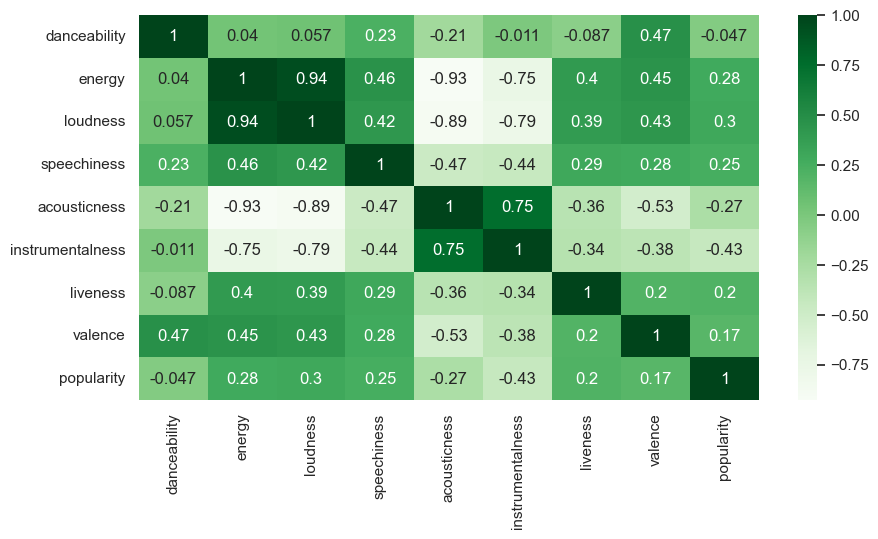

In [5]:
# checking if the audio features are correlated (as well as the popularity)
df_features = df[
    [
        "danceability",
        "energy",
        "loudness",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "liveness",
        "valence",
        "popularity",
        "playlist_name",
    ]
]

plt.figure(figsize=(10, 5))
sns.heatmap(df_features.drop("playlist_name", axis=1).corr(), annot=True, cmap="Greens")

We note:

- Energy and Loudness are very highly correlated
- Instrumentalness and acousticness are very highly correlated
- Energy, Loudness, liveness and valence are postively correlated, and negatively correlated to acousticness and instrumentalness
- speechiness is negatively correlated to instrumentalness (but even more to acousticness?)
- it seems like popularity is a little bit correlated with valence. Happy songs are more popular?


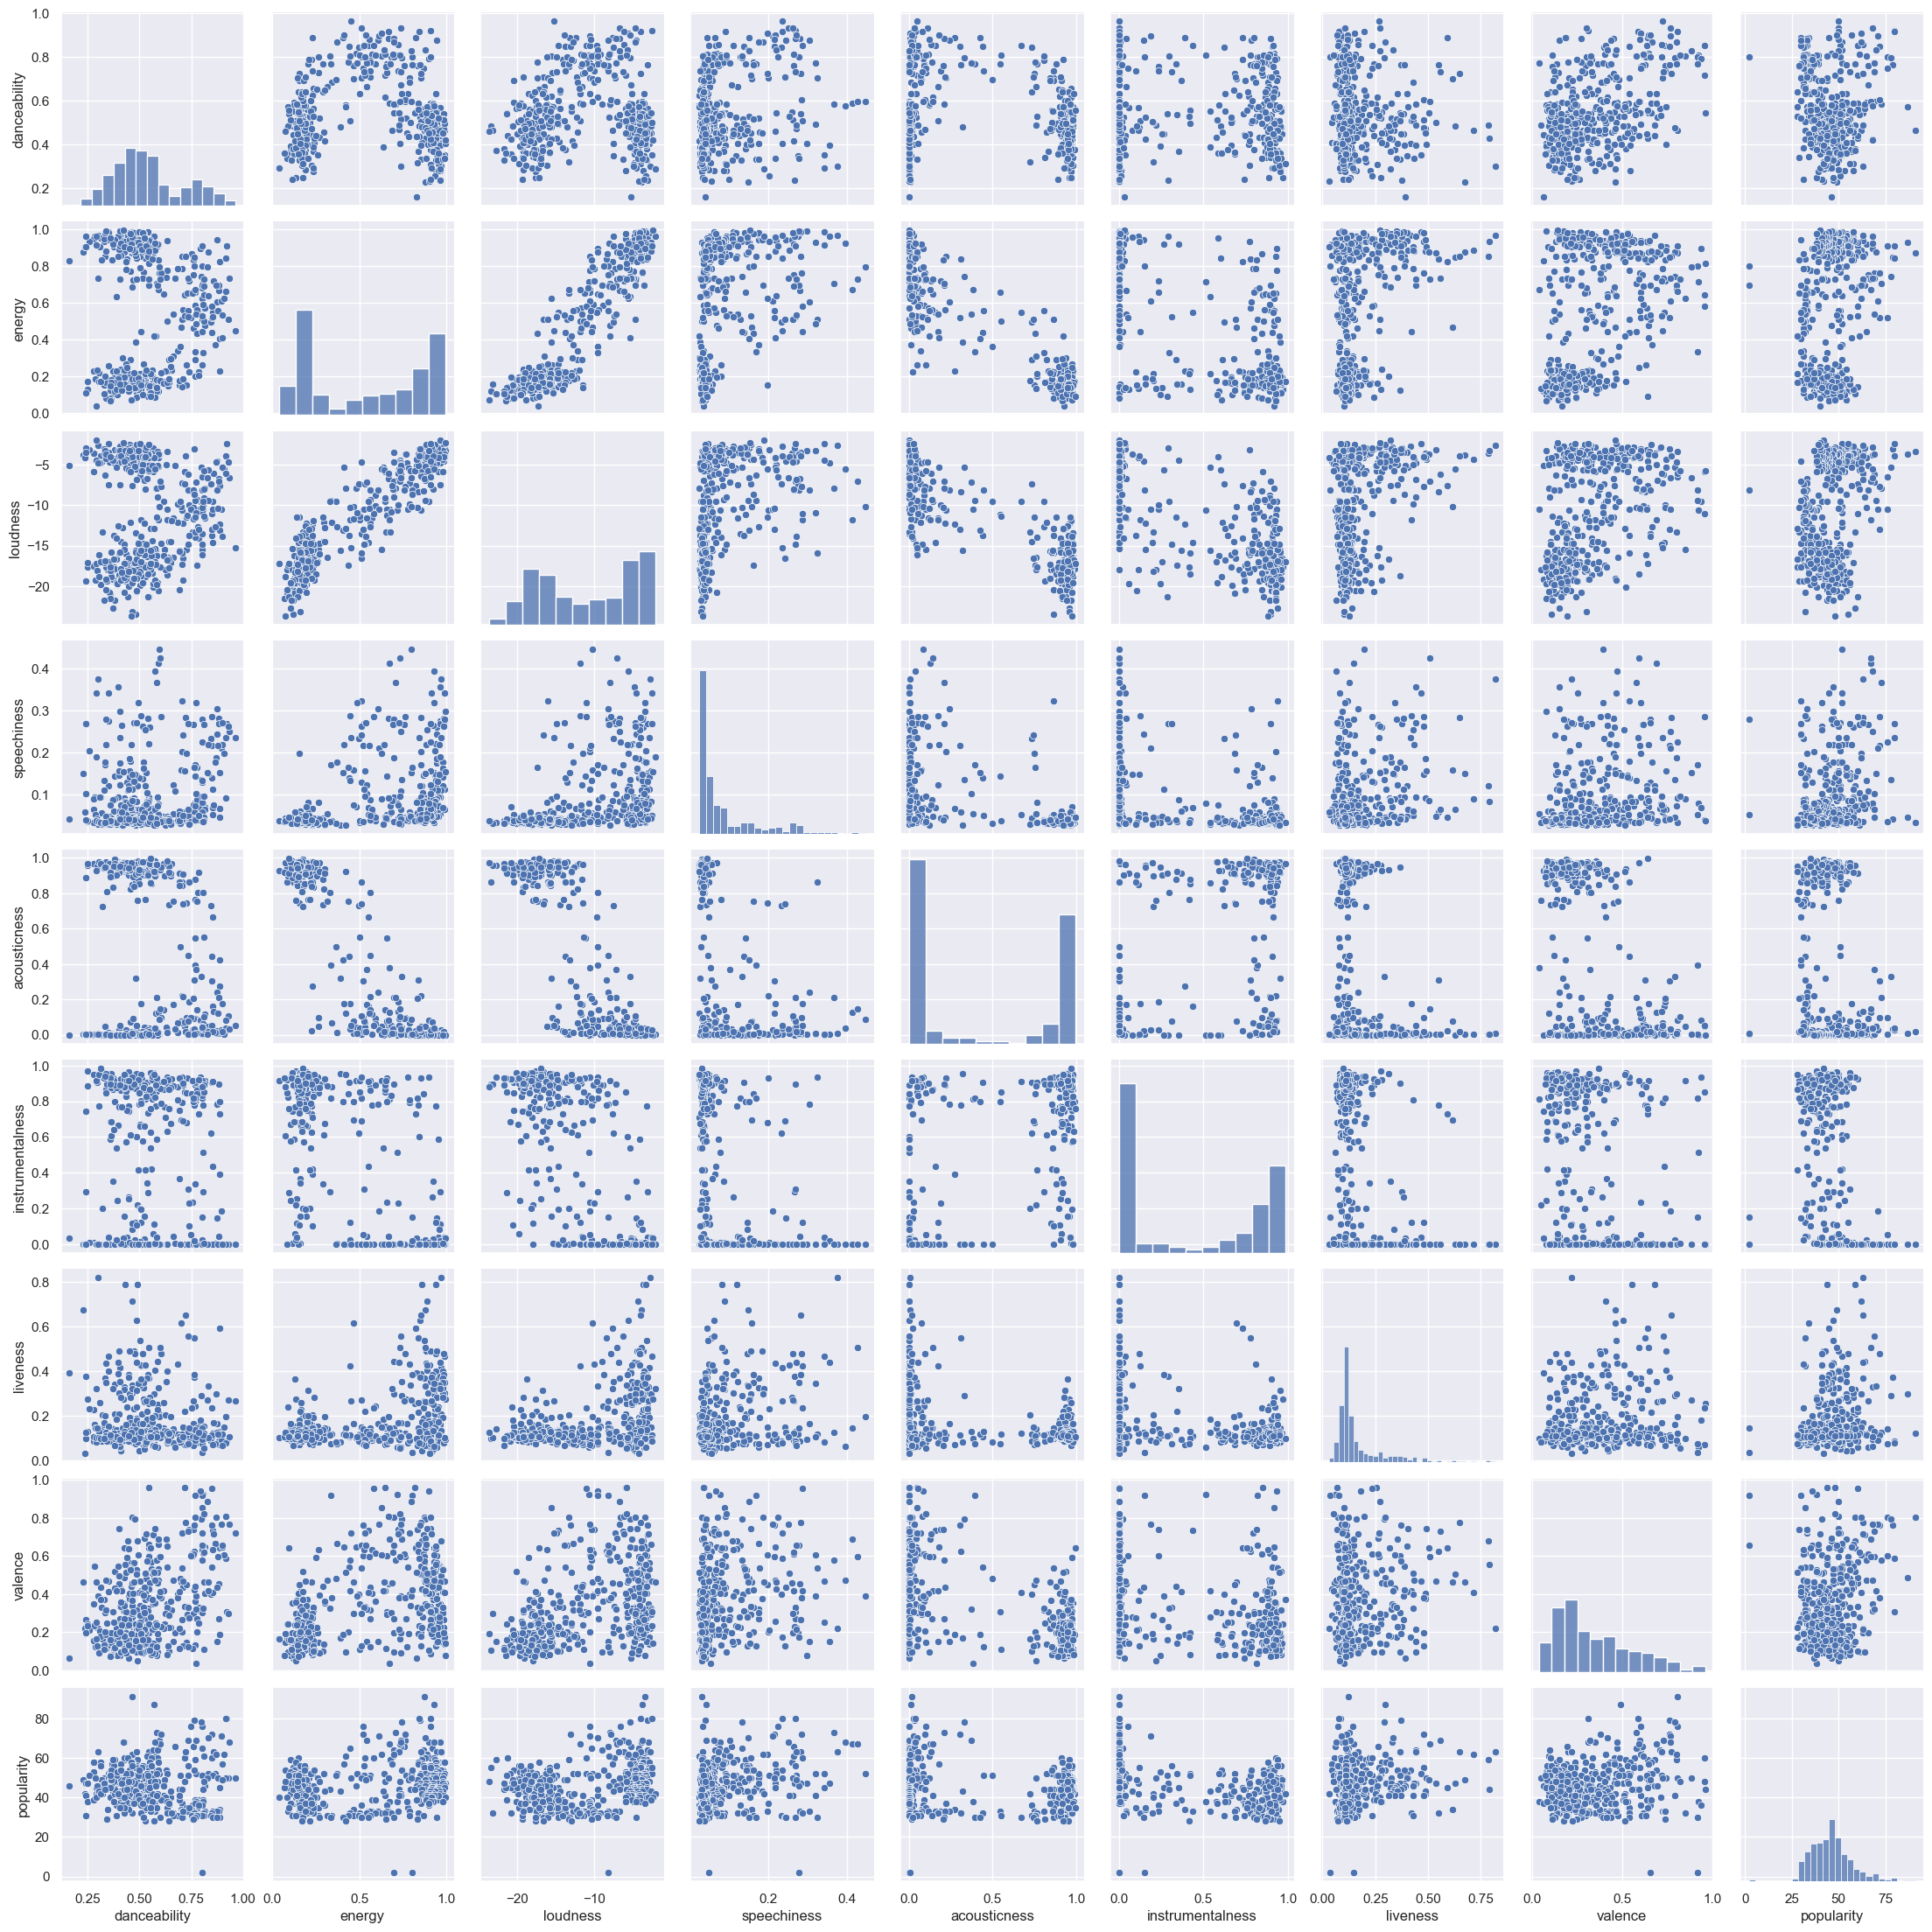

In [6]:
# pairplot of the audio features
sns.pairplot(df_features.drop("playlist_name", axis=1))

- Some features look gaussian (danceability, popularity, valence): these are the one representing continous values
- some are more bimodal (acousticness, instrumentalness): these are the one from binary classification


In [7]:
# Group by playlist_name and calculate the mean of the audio features
df_features.groupby("playlist_name").mean()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,popularity
playlist_name,,,,,,,,,
Summer Jazz,0.478229,0.172626,-17.344874,0.037705,0.931817,0.760700,0.124814,0.207877,43.182857
Lofi House,0.760817,0.566150,-11.166250,0.100747,0.240893,0.745132,0.146133,0.447807,33.300000
West Coast Classics,0.775740,0.659620,-8.275920,0.200394,0.086678,0.012089,0.201956,0.576840,60.680000
hard Rock,0.452827,0.898813,-4.188667,0.108624,0.005839,0.027004,0.235520,0.384488,49.493333


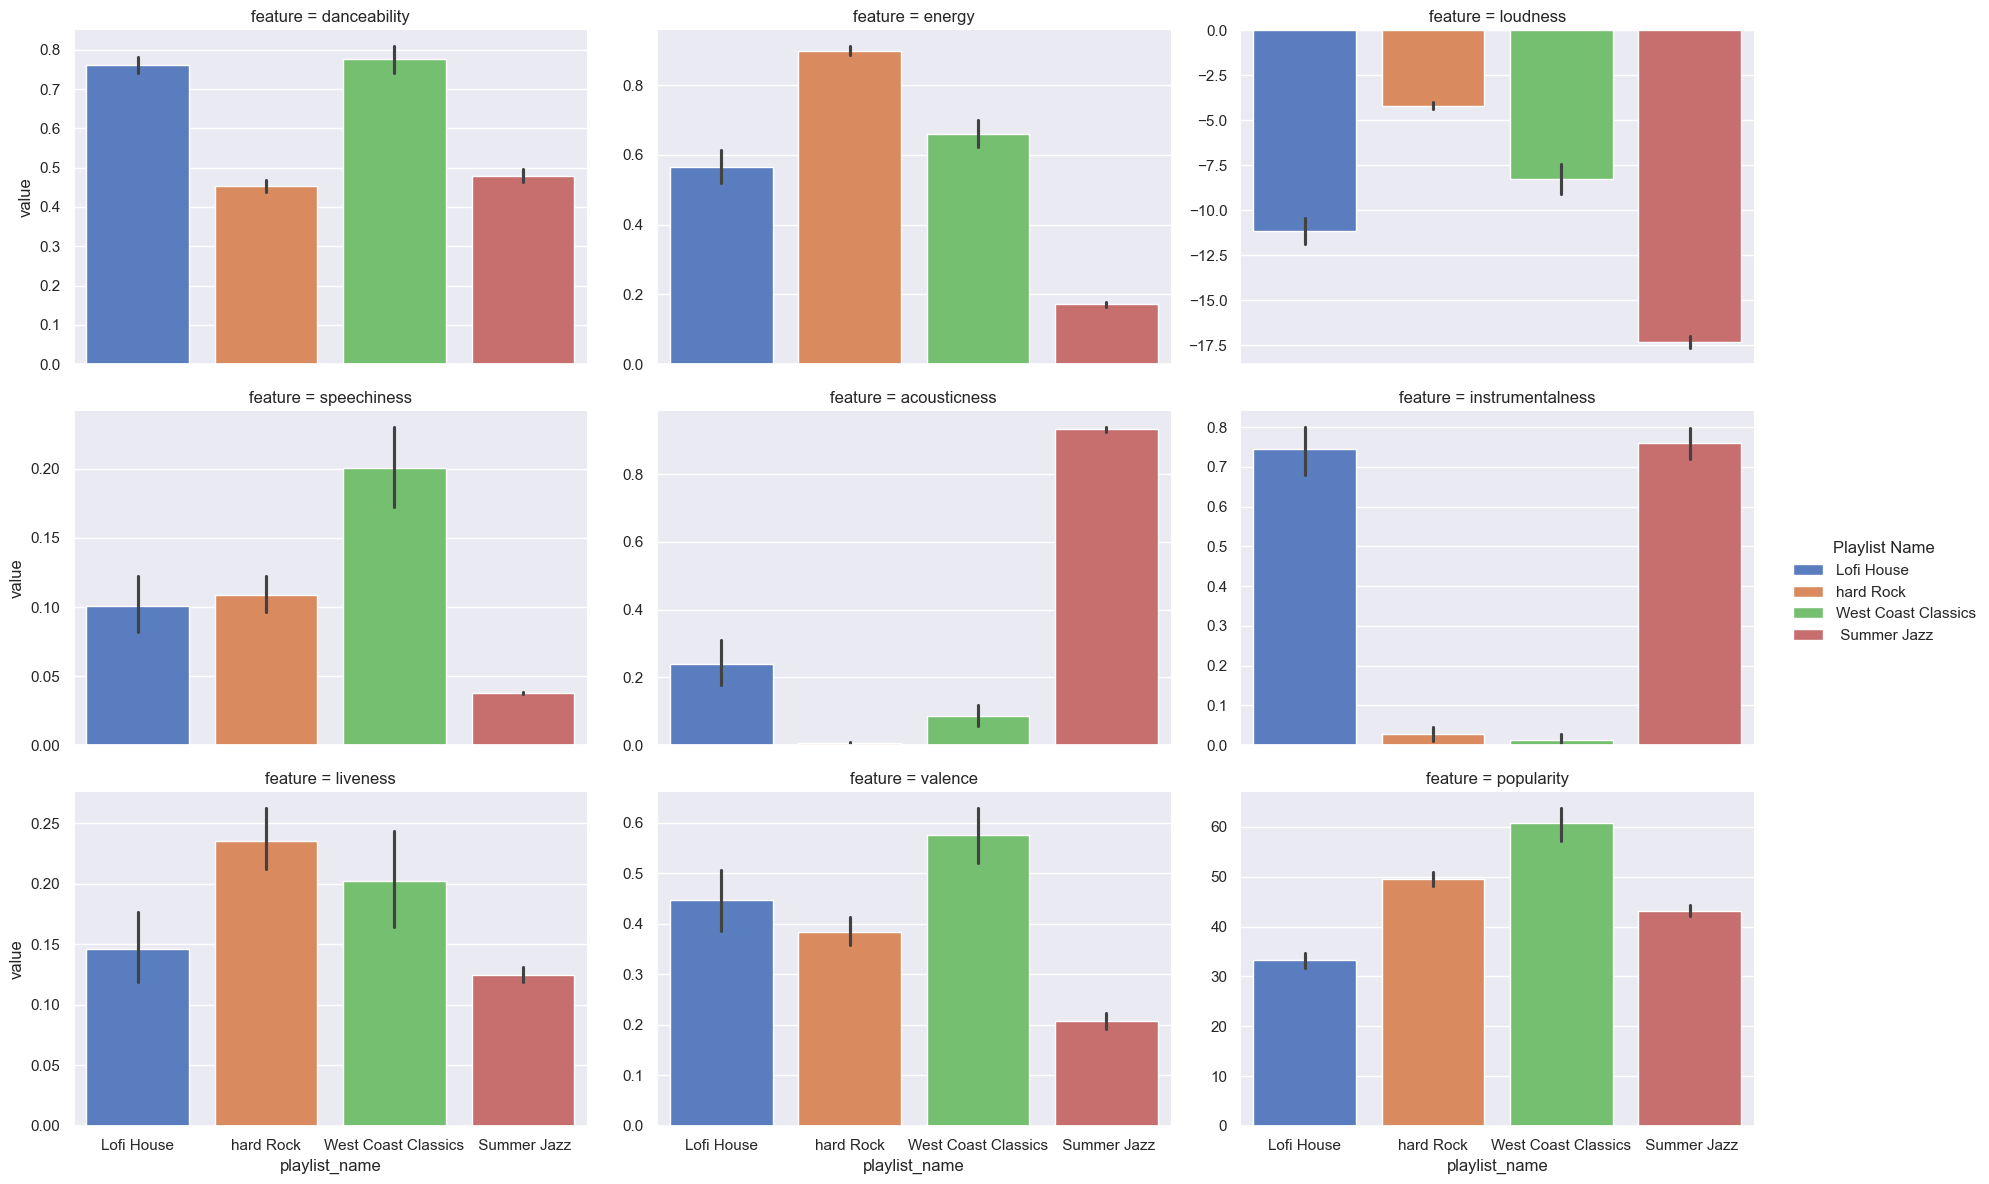

In [8]:
# let's look at average popularity per playlist
df_melted = df_features.melt(
    id_vars="playlist_name", var_name="feature", value_name="value"
)

# facet grid
# Creating the FacetGrid with a legend and specifying hue_order
g = sns.FacetGrid(
    df_melted,
    col="feature",
    col_wrap=3,
    height=4,
    aspect=1.5,
    sharey=False,
    hue="playlist_name",
    palette="muted",
)
g.map(sns.barplot, "playlist_name", "value", order=None)

# Adding the legend
g.add_legend(title="Playlist Name")
g.tight_layout()
plt.show()

<Axes: xlabel='loudness', ylabel='energy'>

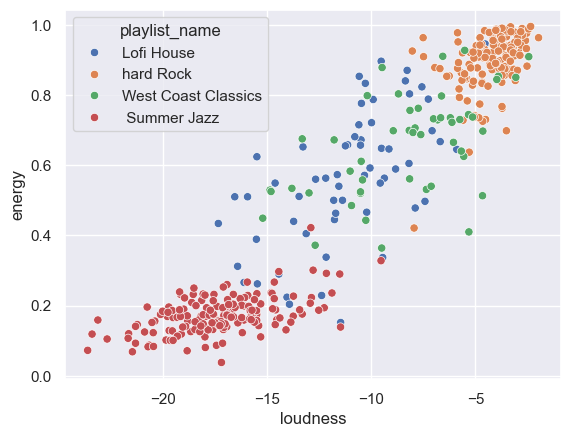

In [9]:
# Let's dive deeper into loudness and energy
sns.scatterplot(data=df_features, x="loudness", y="energy", hue="playlist_name")

It does seem like loudness and energy are highly correlated, and we can easily start to identify clusters of loudness / energy level for the different genre we have!


<Axes: xlabel='acousticness', ylabel='instrumentalness'>

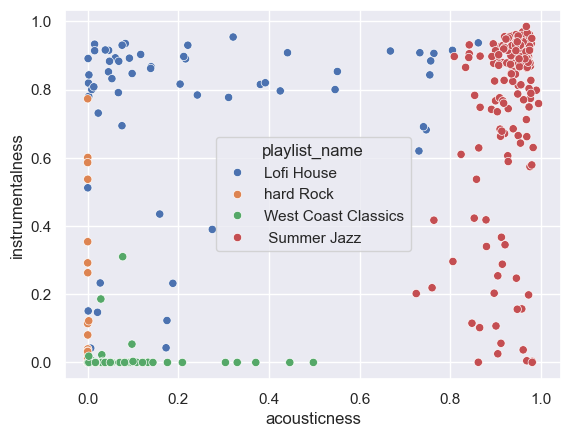

In [10]:
# we can also compare the acousticness and instrumentalness
sns.scatterplot(
    data=df_features, x="acousticness", y="instrumentalness", hue="playlist_name"
)

That seems again to be a good separator for our playlists


## We can run an stastical test for fun


### Let's see if energy between summer jazz and hard rock is stastically different


<Axes: xlabel='playlist_name', ylabel='energy'>

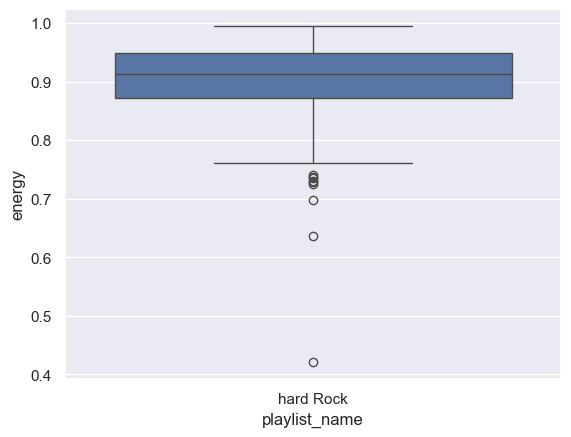

In [11]:
# boxplot of energy level for Summer Jazz and hard Rock
sns.boxplot(
    data=df_features[df_features["playlist_name"].isin(["Summer Jazz", "hard Rock"])],
    x="playlist_name",
    y="energy",
)

In [12]:
# gaussian test
def shapiro_test(data, alpha=0.05):
    stat, p = stats.shapiro(data)
    print("Statistics=%.3f, p=%.3f" % (stat, p))
    if p > alpha:
        print("Sample looks Gaussian (We fail to reject H0)")
    else:
        print("Sample does not look Gaussian (We reject H0)")

In [13]:
summer_jazz_energy = df[df.playlist_name == "Summer Jazz"]["energy"]
hard_rock_energy = df[df.playlist_name == "hard Rock"]["energy"]

print("Summer jazz")
shapiro_test(summer_jazz_energy)
print("Hard rock")
shapiro_test(hard_rock_energy)

Summer jazz
Statistics=nan, p=nan
Sample does not look Gaussian (We reject H0)
Hard rock
Statistics=0.822, p=0.000
Sample does not look Gaussian (We reject H0)


/var/folders/g1/vc18zw8539b9sx__b61c_r8h0000gn/T/ipykernel_13615/1967181992.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = stats.shapiro(data)


In [14]:
# summarize
print(
    f"Summer Jazz: median = {summer_jazz_energy.median()} stdv = {summer_jazz_energy.std()}"
)
print(
    f"Hard Rock: median = {hard_rock_energy.median()} stdv = {hard_rock_energy.std()}"
)

Summer Jazz: median = nan stdv = nan
Hard Rock: median = 0.9135 stdv = 0.07727197558164815


In [15]:
# mannwhitneyu test
def mannwhitneyu_test(data1, data2, alternative="two-sided", alpha=0.05):
    stat, p = stats.mannwhitneyu(data1, data2, alternative=alternative)
    print("Statistics=%.3f, p=%.3f" % (stat, p))

    alpha = 0.05
    if p > alpha:
        print("Same distribution (fail to reject H0)")
    else:
        if alternative == "two-sided":
            print("Different distribution (reject H0)")
        elif alternative == "greater":
            print("First distribution greater (reject H0)")
        else:
            print("Second distribution greater (reject H0)")

In [16]:
# running the test
mannwhitneyu_test(summer_jazz_energy, hard_rock_energy, alternative="less")

Statistics=nan, p=nan
Second distribution greater (reject H0)


/var/folders/g1/vc18zw8539b9sx__b61c_r8h0000gn/T/ipykernel_13615/361235031.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = stats.mannwhitneyu(data1, data2, alternative=alternative)


### Let's see if the popularity is different between the different groups


<Axes: xlabel='playlist_name', ylabel='popularity'>

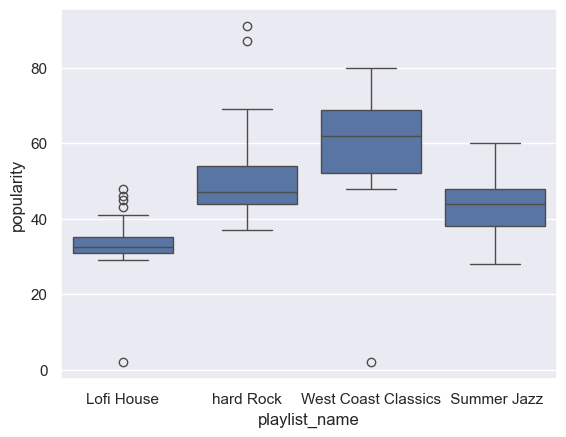

In [17]:
# boxplot of popularity level
sns.boxplot(data=df_features, x="playlist_name", y="popularity")

- Null Hypothesis: The mean popularity of tracks is the same across all playlists.
- Alternative Hypothesis: At least one playlist has a different mean popularity compared to the others.


<Axes: xlabel='popularity', ylabel='Count'>

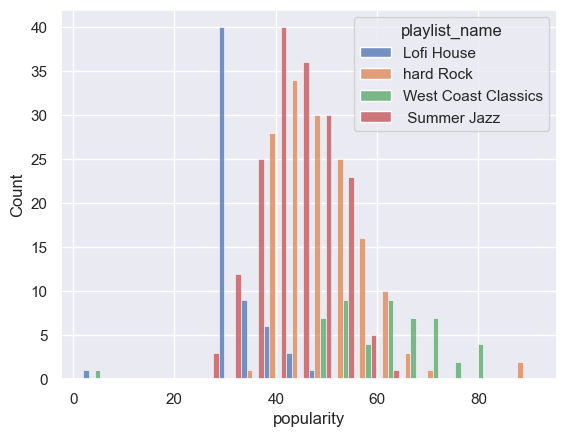

In [18]:
sns.histplot(
    df_features, x="popularity", hue="playlist_name", bins=20, multiple="dodge"
)

In [19]:
# testing for normality
for playlist_name in df_features["playlist_name"].unique():
    print("\n## " + playlist_name)
    shapiro_test(
        df_features[df_features["playlist_name"] == playlist_name]["popularity"]
    )


## Lofi House
Statistics=0.724, p=0.000
Sample does not look Gaussian (We reject H0)

## hard Rock
Statistics=0.890, p=0.000
Sample does not look Gaussian (We reject H0)

## West Coast Classics
Statistics=0.843, p=0.000
Sample does not look Gaussian (We reject H0)

##  Summer Jazz
Statistics=0.989, p=0.213
Sample looks Gaussian (We fail to reject H0)


the Anova test is somehow robust to normality. Since we also have a large number of tracks per playlist, we will pursue with this test.


In [20]:
# Extract the popularity data for each playlist
playlists_popularity = [
    df_features[df_features["playlist_name"] == name]["popularity"].values
    for name in df_features["playlist_name"].unique()
]

for play in playlists_popularity:
    print(len(play))

60
150
50
175


In [21]:
# Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(*playlists_popularity)

print(f"ANOVA F-statistic: {f_stat}")
print(f"ANOVA p-value: {p_value}")

ANOVA F-statistic: 115.57664427953935
ANOVA p-value: 6.338671433563168e-55


Since the p-value is very low, we can reject H0 and conclude that there are enough evidence to reject the fact that all playlists have the same average popularity.


             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj  lower    upper  reject
------------------------------------------------------------------------------
        Summer Jazz          Lofi House  -9.8829   0.0 -13.0709 -6.6948   True
        Summer Jazz West Coast Classics  17.4971   0.0  14.0799 20.9144   True
        Summer Jazz           hard Rock   6.3105   0.0   3.9393  8.6816   True
         Lofi House West Coast Classics    27.38   0.0  23.2994 31.4606   True
         Lofi House           hard Rock  16.1933   0.0  12.9382 19.4485   True
West Coast Classics           hard Rock -11.1867   0.0 -14.6666 -7.7067   True
------------------------------------------------------------------------------


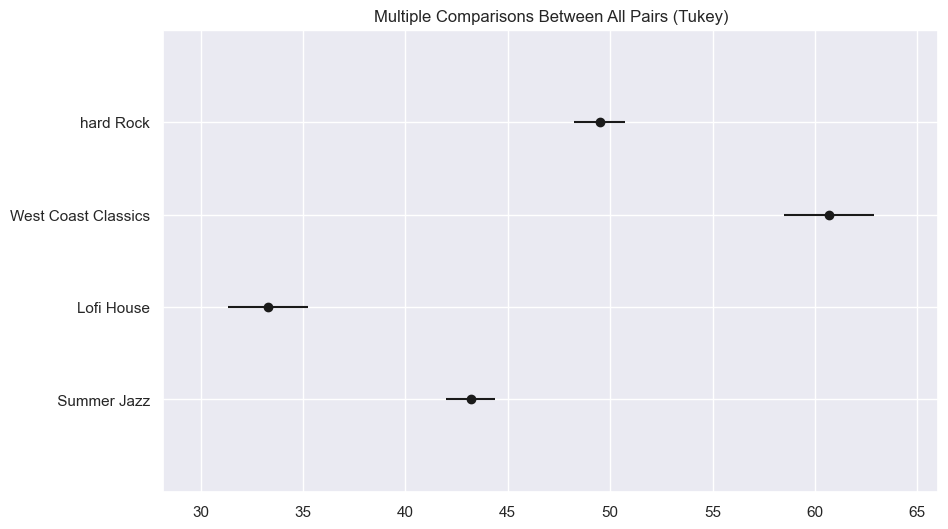

In [22]:
# Assuming df_features contains 'playlist_name' and 'popularity'
tukey = pairwise_tukeyhsd(
    endog=df_features["popularity"], groups=df_features["playlist_name"], alpha=0.05
)

print(tukey)
tukey.plot_simultaneous()  # Plotting the confidence intervals
plt.show()

According to this post - hoc test, it seems like pairwise, all playlists have difffent popularity on average.
